In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/states_hic_cleaned.csv')
df.head()

,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016)
0,Alabama,14.6,10.1,-4.5,215000,2545000,165534,152206,310.0,False,799176.0,910775,111599.0,989855
1,Alaska,19.9,14.9,-5.0,36000,390000,17995,16205,750.0,True,122334.0,166625,44291.0,88966
2,Arizona,16.9,10.8,-6.1,410000,3288000,179445,124346,230.0,True,1201770.0,1716198,514428.0,1175624
3,Arkansas,17.5,9.5,-8.0,234000,1365000,63357,56843,306.0,True,556851.0,920194,363343.0,606146
4,California,18.5,8.6,-9.9,3826000,19552000,1415428,1239893,309.0,True,7755381.0,11843081,4087700.0,5829777


##### 1. Medicaid Expansion Composition

In [4]:
# Drop national aggregate row

df = df[df["State"] != "United States"].copy()

In [5]:
# Ensure expansion flag is boolean
df["State Medicaid Expansion (2016)"] = df["State Medicaid Expansion (2016)"].astype(bool)

# Counts
expansion_counts = df["State Medicaid Expansion (2016)"].value_counts()

# Rename index for readability
expansion_counts.index = ["Non‑expansion", "Expansion"] if False in df["State Medicaid Expansion (2016)"].unique() else ["Expansion", "Non‑expansion"]

# Proportions
expansion_props = (100 * (expansion_counts / expansion_counts.sum())).round(2)

# Combine into one table
expansion_summary = (
    pd.DataFrame({
        "Count": expansion_counts,
        "Proportion (%)": expansion_props
    })
)

expansion_summary

,Count,Proportion (%)
Non‑expansion,32,62.75
Expansion,19,37.25


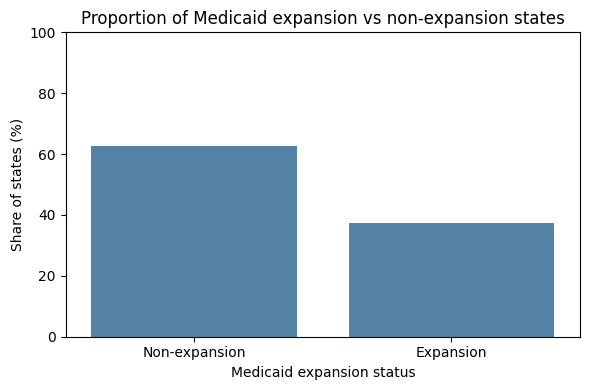

In [6]:
# Assuming expansion_summary from before and proportions as fractions
expansion_summary_plot = expansion_summary.copy()

plt.figure(figsize=(6,4))
sns.barplot(
    data=expansion_summary_plot.reset_index(),
    x="index", y="Proportion (%)",
    color="steelblue"
)
plt.xlabel("Medicaid expansion status")
plt.ylabel("Share of states (%)")
plt.title("Proportion of Medicaid expansion vs non-expansion states")
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

###### Larger proportion of states are non‑expansion compared with Medicaid expansion states, with non‑expansion states making up roughly two‑thirds of the total. This imbalance in group sizes is important context for later analyses, because any differences in uninsured rates or Medicaid enrollment must be interpreted knowing that expansion states represent a smaller share of all states in the dataset.

##### 2. Uninsured rate change for expansion and non‑expansion states

In [7]:
df["Uninsured Rate Change (2010-2015)"] = df["Uninsured Rate Change (2010-2015)"].astype(float)

# Mean uninsured rate change by expansion status
uninsured_change_by_group = (
df.groupby("State Medicaid Expansion (2016)")["Uninsured Rate Change (2010-2015)"]
.mean()
.rename(index={True: "Expansion", False: "Non-expansion"})
)

uninsured_change_by_group

State Medicaid Expansion (2016)
Non-expansion   -4.721053
Expansion       -5.856250
Name: Uninsured Rate Change (2010-2015), dtype: float64

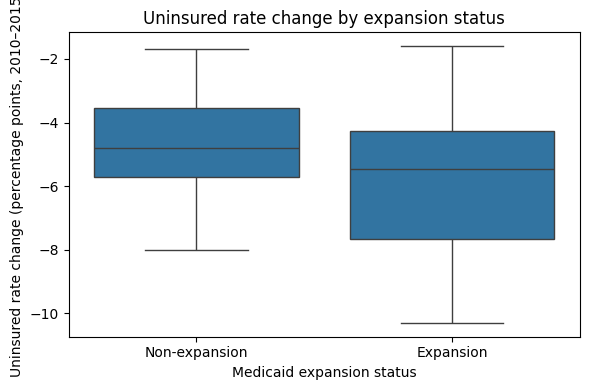

In [10]:
# Boxplot Visualization

df["Expansion status"] = df["State Medicaid Expansion (2016)"].map({True: "Expansion", False: "Non-expansion"})
plt.figure(figsize=(6, 4))
sns.boxplot(
    data=df,
    x="Expansion status",
    y="Uninsured Rate Change (2010-2015)"
)
plt.xlabel("Medicaid expansion status")
plt.ylabel("Uninsured rate change (percentage points, 2010–2015)")
plt.title("Uninsured rate change by expansion status")
plt.tight_layout()
plt.show()

###### The boxplot shows that Medicaid expansion states experienced a larger drop in uninsured rates than non‑expansion states. Expansion states also have a wider spread in uninsured rate reductions, indicating more variability but generally bigger gains in coverage compared with the tighter, smaller reductions seen in non‑expansion states.